<a href="https://colab.research.google.com/github/Belajargihh/Klasifikasi_Alat_Tulis/blob/main/klasifikasi_alat_tulis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 0. Mount Google Drive (jalankan dulu ini)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 📚 Step 2: Import Library
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
# ⚙️ Step 3: Konfigurasi
IMG_SIZE = (256, 256)
BATCH_SIZE = 64
EPOCHS = 50
DATA_DIR = '/content/drive/MyDrive/Alat_Tulis'  # Ganti sesuai path datasetmu
MODEL_PATH = '/content/drive/MyDrive/model_mobilenet_alat_tulis.keras'

In [4]:
# Ubah validation_split menjadi 0.2 (20% untuk validasi + test)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    rotation_range=40,
    zoom_range=0.3,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Generator untuk data training (80%)
train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',  # 80% data
    shuffle=True,
    seed=42
)

# Generator untuk data validation (10%)
val_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',  # 10% data
    shuffle=False,
    seed=42
)

# Generator untuk data test (10%)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_generator = test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',  # 10% data
    shuffle=False,
    seed=42  # menggunakan seed yang sama
)

# Cetak jumlah gambar di setiap subset
print(f"Found {train_generator.samples} images for training ({train_generator.samples/(train_generator.samples+val_generator.samples+test_generator.samples)*100:.1f}%)")
print(f"Found {val_generator.samples} images for validation ({val_generator.samples/(train_generator.samples+val_generator.samples+test_generator.samples)*100:.1f}%)")
print(f"Found {test_generator.samples} images for testing ({test_generator.samples/(train_generator.samples+val_generator.samples+test_generator.samples)*100:.1f}%)")

Found 1080 images belonging to 4 classes.
Found 120 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Found 1080 images for training (75.0%)
Found 120 images for validation (8.3%)
Found 240 images for testing (16.7%)


In [12]:
# 🧠 Step 5: Transfer Learning Model
base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Hanya menggunakan ModelCheckpoint tanpa EarlyStopping
model_checkpoint = ModelCheckpoint(MODEL_PATH, save_best_only=True, monitor='val_accuracy', mode='max')

# Pada saat model.fit(), Anda tidak perlu memasukkan early_stop di callback
# callbacks=[model_checkpoint] saja

<ipython-input-12-89a4f2cf4e00>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')


In [13]:
# 🚀 Step 6: Train Model (tetap sama)
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[model_checkpoint]
)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 414s 24s/step - accuracy: 0.2656 - loss: 1.7048 - val_accuracy: 0.4500 - val_loss: 1.1874
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.4517 - loss: 1.2552 - val_accuracy: 0.6083 - val_loss: 0.9673
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 105s 6s/step - accuracy: 0.5606 - loss: 1.0062 - val_accuracy: 0.7167 - val_loss: 0.8257
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 109s 6s/step - accuracy: 0.6874 - loss: 0.8352 - val_accuracy: 0.7500 - val_loss: 0.6978
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 114s 7s/step - accuracy: 0.7150 - loss: 0.7616 - val_accuracy: 0.7833 - val_loss: 0.6612
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 143s 7s/step - accuracy: 0.7224 - loss: 0.7101 - val_accuracy: 0.7750 - val_loss: 0.5690
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 114s 7s/step - accuracy: 0.7874 - loss: 0.6186 - val_accuracy: 0.8583 - val_loss: 0.5149
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 106s 6s/step - accuracy: 0.7954 - loss: 0.5860 - val_accuracy: 0.8333 - 

In [14]:
# Evaluasi model pada data test
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - accuracy: 0.9502 - loss: 0.2052
Test accuracy: 94.58%


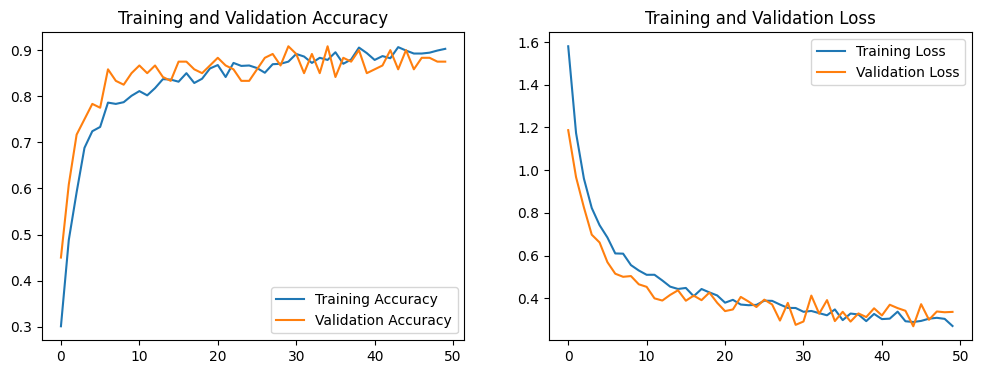

In [15]:
# Visualisasi hasil training dan testing
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Nama Kelas: ['Buku', 'Penghapus', 'Pensil', 'Polpen']
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step


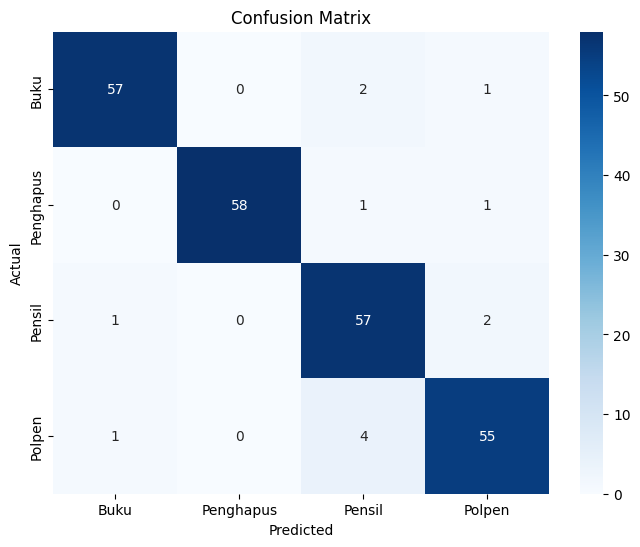

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dapatkan nama kelas
class_names = list(train_generator.class_indices.keys())
print("Nama Kelas:", class_names)

# Evaluasi model pada data test
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Matriks konfusi
conf_mat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image_tf(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalisasi jika diperlukan

    pred = model.predict(img_array)
    class_idx = np.argmax(pred[0])

    plt.imshow(img)
    plt.title(f"Predicted: {class_names[class_idx]}")
    plt.axis('off')
    plt.show()

# Contoh penggunaan:
# predict_image_tf('path_ke_gambar.jpg', model)

In [ ]:
# === Upload Gambar ===
from google.colab import files
uploaded = files.upload()
img_path = "pensil.jpg"  # gunakan nama file yang kamu upload

# === Import Library ===
from PIL import Image
import torchvision.transforms as transforms
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

# === Setup Device dan Model ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import torchvision.models as models
model = models.resnet18(pretrained=True)  # ganti dengan model hasil training jika ada
model = model.to(device)
model.eval()

# === Class Names (Ganti sesuai dataset kamu) ===
class_names = ['Buku', 'Polpen', 'Pensil', 'Penghapus']

# === Preprocess Gambar ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

img = Image.open(img_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)

# === Grad-CAM Function ===
def grad_cam(model, image_tensor, target_class):
    model.eval()
    gradients, activations = [], []

    def backward_hook(module, grad_in, grad_out):
        gradients.append(grad_out[0])
    def forward_hook(module, input, output):
        activations.append(output)

    final_conv = model.layer4[1]  # ganti jika model kamu beda
    f_handle = final_conv.register_forward_hook(forward_hook)
    b_handle = final_conv.register_backward_hook(backward_hook)

    output = model(image_tensor)
    model.zero_grad()
    class_loss = output.squeeze(0)[target_class]
    class_loss.backward()

    grads = gradients[0].cpu().data.numpy()[0]
    acts = activations[0].cpu().data.numpy()[0]
    weights = np.mean(grads, axis=(1, 2))
    cam = np.zeros(acts.shape[1:], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * acts[i, :, :]
    cam = np.maximum(cam, 0)
    cam = cv2.resize(cam, (128, 128))
    cam = (cam - cam.min()) / (cam.max() + 1e-8)
    f_handle.remove(); b_handle.remove()
    return cam

# === Prediksi dan Visualisasi ===
output = model(input_tensor)
pred_class = output.argmax(1).item()
heatmap = grad_cam(model, input_tensor, pred_class)

if heatmap is not None:
    img_np = np.array(img.resize((224,224)))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    overlayed_img = cv2.addWeighted(img_np, 0.5, heatmap_colored, 0.5, 0)

    plt.figure(figsize=(6,6))
    plt.imshow(overlayed_img)
    plt.title(f"Grad-CAM: {class_names[pred_class]}")
    plt.axis('off')
    plt.show()

    print("Predicted class index:", pred_class)
print("Output raw logits:", output)



KeyboardInterrupt: 